# MSCS 634 – Lab 1: Data Visualization, Preprocessing, and Statistical Analysis
**Name:** Sandesh Shrestha 
**Course:** MSCS-634  
**Assignment:** Lab 1  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make charts display inside the notebook
%matplotlib inline

In [6]:
# Create a simple weather dataset (2025 daily weather)
dates = pd.date_range(start="2025-01-01", end="2025-01-15")  # first 15 days as example
temp_max = [40, 42, 45, 46, 48, 44, 43, 47, 49, 50, 51, 45, 46, 48, 47]
temp_min = [30, 32, 33, 35, 37, 34, 31, 36, 38, 39, 40, 34, 35, 36, 37]
humidity = [80, 75, 78, 72, 70, 74, 76, 73, 71, 69, 68, 72, 74, 73, 71]
wind_speed = [5, 7, 6, 4, 5, 6, 8, 7, 6, 5, 7, 6, 4, 5, 6]
precipitation = [0.1, 0.0, 0.2, 0.0, 0.0, 0.15, 0.05, 0.0, 0.1, 0.05, 0.0, 0.2, 0.1, 0.0, 0.0]

# Make it a DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Temp_Max_F": temp_max,
    "Temp_Min_F": temp_min,
    "Humidity_%": humidity,
    "Wind_Speed_mph": wind_speed,
    "Precipitation_in": precipitation
})

df.head()

,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Wind_Speed_mph,Precipitation_in
0,2025-01-01,40,30,80,5,0.1
1,2025-01-02,42,32,75,7,0.0
2,2025-01-03,45,33,78,6,0.2
3,2025-01-04,46,35,72,4,0.0
4,2025-01-05,48,37,70,5,0.0


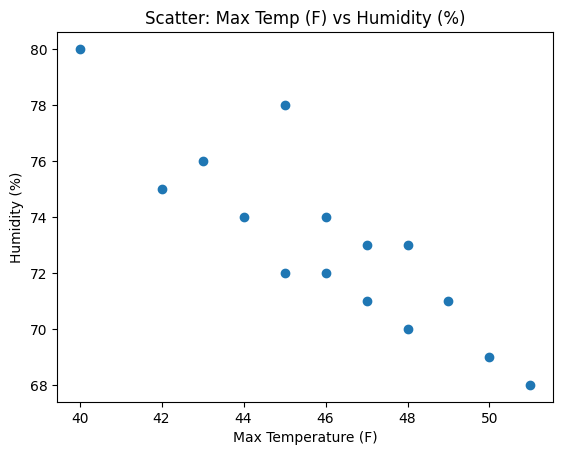

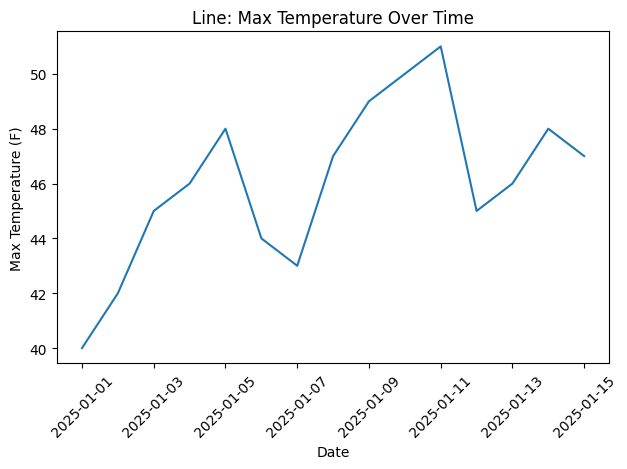

In [8]:
import matplotlib.pyplot as plt

# make a folder for images
import os
os.makedirs("screenshots", exist_ok=True)

# 1) Scatter: Max Temp vs Humidity
plt.figure()
plt.scatter(df["Temp_Max_F"], df["Humidity_%"])
plt.title("Scatter: Max Temp (F) vs Humidity (%)")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Humidity (%)")
plt.savefig("screenshots/scatter_tempmax_vs_humidity.png", bbox_inches="tight")
plt.show()

# 2) Line: Max Temp over Time
plt.figure()
plt.plot(df["Date"], df["Temp_Max_F"])
plt.title("Line: Max Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Max Temperature (F)")
plt.xticks(df["Date"][::2], rotation=45)  # show every 2nd date & rotate labels
plt.tight_layout()
plt.savefig("screenshots/line_tempmax_over_time.png", bbox_inches="tight")
plt.show()

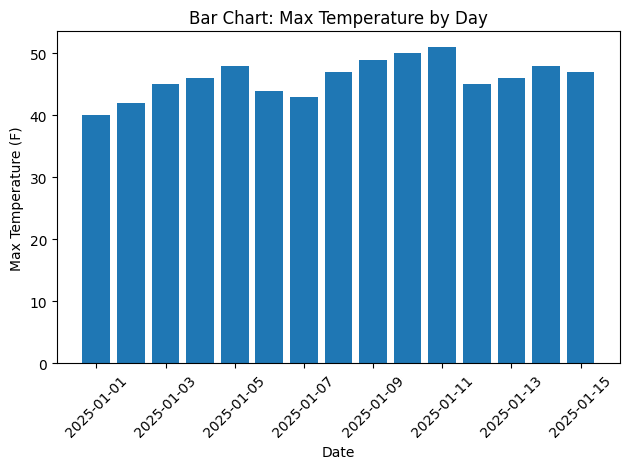

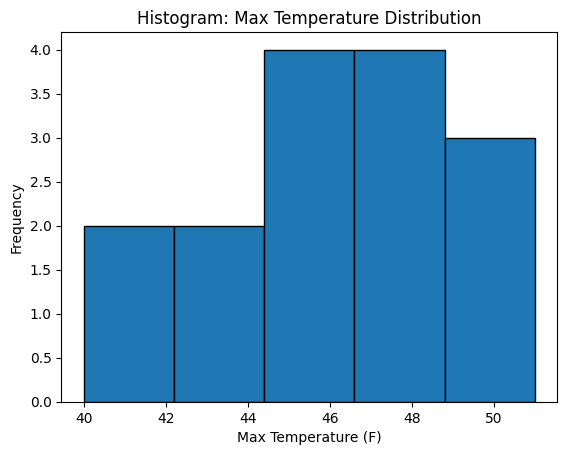

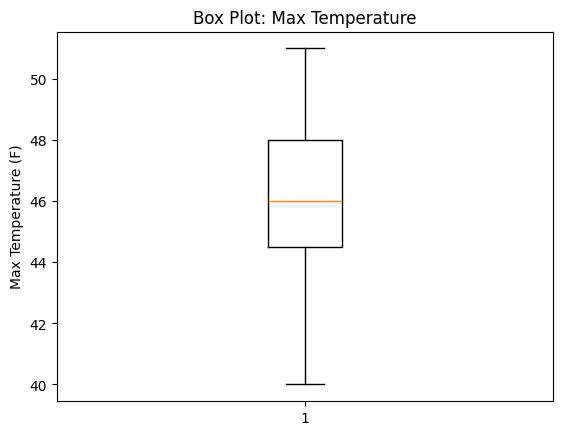

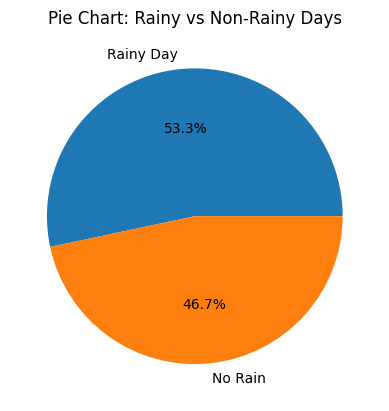

In [11]:
# 3) Bar Chart – Max Temperature by Day
plt.figure()
plt.bar(df["Date"], df["Temp_Max_F"])
plt.title("Bar Chart: Max Temperature by Day")
plt.xlabel("Date")
plt.ylabel("Max Temperature (F)")
plt.xticks(df["Date"][::2], rotation=45)
plt.tight_layout()
plt.savefig("screenshots/bar_temp_by_day.png", bbox_inches="tight")
plt.show()

# 4) Histogram – Distribution of Max Temperature
plt.figure()
plt.hist(df["Temp_Max_F"], bins=5, edgecolor="black")
plt.title("Histogram: Max Temperature Distribution")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Frequency")
plt.savefig("screenshots/hist_tempmax.png", bbox_inches="tight")
plt.show()

# 5) Box Plot – Max Temperature Spread
plt.figure()
plt.boxplot(df["Temp_Max_F"])
plt.title("Box Plot: Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.savefig("screenshots/box_tempmax.png", bbox_inches="tight")
plt.show()

# 6) Pie Chart – Precipitation Days
rain_labels = ["Rainy Day", "No Rain"]
rain_counts = [(df["Precipitation_in"] > 0).sum(), (df["Precipitation_in"] == 0).sum()]
plt.figure()
plt.pie(rain_counts, labels=rain_labels, autopct="%1.1f%%")
plt.title("Pie Chart: Rainy vs Non-Rainy Days")
plt.savefig("screenshots/pie_rain_vs_no_rain.png", bbox_inches="tight")
plt.show()

In [12]:
import os
os.makedirs("screenshots", exist_ok=True)

In [13]:
import numpy as np

# 1) Show missing counts BEFORE
print("Missing BEFORE:")
print(df.isna().sum())

# 2) Inject a couple of NaNs
df_missing = df.copy()
df_missing.loc[2, "Temp_Max_F"] = np.nan
df_missing.loc[5, "Humidity_%"] = np.nan

print("\nAfter injecting a few NaNs:")
print(df_missing.isna().sum())

# Save BEFORE snapshot
df_missing.head().to_csv("screenshots/step3_missing_before_head.csv", index=False)
with open("screenshots/step3_missing_before_counts.txt", "w") as f:
    f.write(str(df_missing.isna().sum()))

# 3) Handle missing:
#    - numeric columns -> fill with column mean
numeric_cols = ["Temp_Max_F", "Temp_Min_F", "Humidity_%", "Wind_Speed_mph", "Precipitation_in"]
df_filled = df_missing.copy()
for c in numeric_cols:
    df_filled[c] = df_filled[c].fillna(df_filled[c].mean())

print("\nMissing AFTER (filled numeric with mean):")
print(df_filled.isna().sum())

# Save AFTER snapshot
df_filled.head().to_csv("screenshots/step3_missing_after_head.csv", index=False)
with open("screenshots/step3_missing_after_counts.txt", "w") as f:
    f.write(str(df_filled.isna().sum()))


Missing BEFORE:
Date                0
Temp_Max_F          0
Temp_Min_F          0
Humidity_%          0
Wind_Speed_mph      0
Precipitation_in    0
dtype: int64

After injecting a few NaNs:
Date                0
Temp_Max_F          1
Temp_Min_F          0
Humidity_%          1
Wind_Speed_mph      0
Precipitation_in    0
dtype: int64

Missing AFTER (filled numeric with mean):
Date                0
Temp_Max_F          0
Temp_Min_F          0
Humidity_%          0
Wind_Speed_mph      0
Precipitation_in    0
dtype: int64


In [14]:
# IQR-based outlier detection on Temp_Max_F
Q1 = df_filled["Temp_Max_F"].quantile(0.25)
Q3 = df_filled["Temp_Max_F"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outlier_mask = (df_filled["Temp_Max_F"] < lower) | (df_filled["Temp_Max_F"] > upper)

print(f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
print(f"Lower Bound={lower:.2f}, Upper Bound={upper:.2f}")
print("Outliers count:", int(outlier_mask.sum()))
print("\nOutlier rows (if any):")
display(df_filled.loc[outlier_mask])

# Save summary + dataset head after removal
import os
os.makedirs("screenshots", exist_ok=True)
with open("screenshots/step3_iqr_summary.txt", "w") as f:
    f.write(
        f"Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}\n"
        f"Lower={lower:.2f}, Upper={upper:.2f}\n"
        f"Outliers count: {int(outlier_mask.sum())}\n"
    )

df_no_outliers = df_filled.loc[~outlier_mask].reset_index(drop=True)
df_no_outliers.head().to_csv("screenshots/step3_after_outlier_removal_head.csv", index=False)

Q1=44.50, Q3=48.00, IQR=3.50
Lower Bound=39.25, Upper Bound=53.25
Outliers count: 0

Outlier rows (if any):


,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Wind_Speed_mph,Precipitation_in


In [16]:
# 70% random sample to reduce rows
df_reduced = df_no_outliers.sample(frac=0.7, random_state=42).reset_index(drop=True)
print("Before reduction:", df_no_outliers.shape)
print("After reduction:", df_reduced.shape)

# Save shapes
with open("screenshots/step3_reduction_shapes.txt", "w") as f:
    f.write(f"Before: {df_no_outliers.shape}\nAfter (70%): {df_reduced.shape}")

# Drop a column (Wind_Speed_mph)
df_reduced_dim = df_reduced.drop(columns=["Wind_Speed_mph"])
print("Columns after drop:", df_reduced_dim.columns.tolist())

with open("screenshots/step3_reduction_drop.txt", "w") as f:
    f.write("Dropped column: Wind_Speed_mph\n")
    f.write("Remaining columns: " + ", ".join(df_reduced_dim.columns))
df_reduced_dim.head()

Before reduction: (15, 6)
After reduction: (10, 6)
Columns after drop: ['Date', 'Temp_Max_F', 'Temp_Min_F', 'Humidity_%', 'Precipitation_in']


,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Precipitation_in
0,2025-01-10,50.0,39,69.0,0.05
1,2025-01-12,45.0,34,72.0,0.20
2,2025-01-01,40.0,30,80.0,0.10
3,2025-01-14,48.0,36,73.0,0.00
4,2025-01-06,44.0,34,73.0,0.15


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numeric columns to scale
scale_cols = ["Temp_Max_F", "Temp_Min_F", "Humidity_%", "Precipitation_in"]

# BEFORE scaling
print("Before Scaling:")
display(df_reduced_dim.head())

# Min–Max Scaling (0–1 range)
mm = MinMaxScaler()
df_mm = df_reduced_dim.copy()
df_mm[scale_cols] = mm.fit_transform(df_mm[scale_cols])
print("\nAfter Min-Max Scaling:")
display(df_mm.head())

# Z-score Standardization (mean=0, std=1)
zs = StandardScaler()
df_zs = df_reduced_dim.copy()
df_zs[scale_cols] = zs.fit_transform(df_zs[scale_cols])
print("\nAfter Z-Score Standardization:")
display(df_zs.head())

# Discretization: bucket Temp_Max_F into 3 categories
bins = df_reduced_dim["Temp_Max_F"].quantile([0, 1/3, 2/3, 1]).values
labels = ["Low", "Moderate", "High"]
df_disc = df_reduced_dim.copy()
df_disc["Temp_Max_Bucket"] = pd.cut(
    df_reduced_dim["Temp_Max_F"], bins=bins, labels=labels, include_lowest=True
)

print("\nAfter Discretization (Temp_Max_Bucket added):")
display(df_disc.head())

# Save evidence files for submission folder
df_mm.head().to_csv("screenshots/step3_minmax_head.csv", index=False)
df_zs.head().to_csv("screenshots/step3_zscore_head.csv", index=False)
df_disc[["Temp_Max_F", "Temp_Max_Bucket"]].head().to_csv("screenshots/step3_discretized_head.csv", index=False)


Before Scaling:


,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Precipitation_in
0,2025-01-10,50.0,39,69.0,0.05
1,2025-01-12,45.0,34,72.0,0.20
2,2025-01-01,40.0,30,80.0,0.10
3,2025-01-14,48.0,36,73.0,0.00
4,2025-01-06,44.0,34,73.0,0.15



After Min-Max Scaling:


,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Precipitation_in
0,2025-01-10,1.0,1.000000,0.000000,0.25
1,2025-01-12,0.5,0.444444,0.272727,1.00
2,2025-01-01,0.0,0.000000,1.000000,0.50
3,2025-01-14,0.8,0.666667,0.363636,0.00
4,2025-01-06,0.4,0.444444,0.363636,0.75



After Z-Score Standardization:


,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Precipitation_in
0,2025-01-10,1.354796,1.470429,-1.257237,-0.384111
1,2025-01-12,-0.303171,-0.367607,-0.359211,1.536443
2,2025-01-01,-1.961138,-1.838037,2.035527,0.256074
3,2025-01-14,0.691609,0.367607,-0.059868,-1.024295
4,2025-01-06,-0.634765,-0.367607,-0.059868,0.896258



After Discretization (Temp_Max_Bucket added):


,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Precipitation_in,Temp_Max_Bucket
0,2025-01-10,50.0,39,69.0,0.05,High
1,2025-01-12,45.0,34,72.0,0.20,Low
2,2025-01-01,40.0,30,80.0,0.10,Low
3,2025-01-14,48.0,36,73.0,0.00,Moderate
4,2025-01-06,44.0,34,73.0,0.15,Low


In [19]:
# 4.1 Overview — info and describe on the ORIGINAL dataset df
import os
os.makedirs("screenshots", exist_ok=True)

# .info() → capture to text + show on screen
import sys, io
buf = io.StringIO()
df.info(buf=buf)
info_text = buf.getvalue()
print(info_text)
with open("screenshots/step4_info.txt", "w") as f:
    f.write(info_text)

# .describe() → save to text + show on screen
desc = df.describe(include="all")
display(desc)
with open("screenshots/step4_describe.txt", "w") as f:
    f.write(desc.to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15 non-null     datetime64[ns]
 1   Temp_Max_F        15 non-null     int64         
 2   Temp_Min_F        15 non-null     int64         
 3   Humidity_%        15 non-null     int64         
 4   Wind_Speed_mph    15 non-null     int64         
 5   Precipitation_in  15 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 852.0 bytes



,Date,Temp_Max_F,Temp_Min_F,Humidity_%,Wind_Speed_mph,Precipitation_in
count,15,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2025-01-08 00:00:00,46.066667,35.133333,73.066667,5.800000,0.063333
min,2025-01-01 00:00:00,40.000000,30.000000,68.000000,4.000000,0.000000
25%,2025-01-04 12:00:00,44.500000,33.500000,71.000000,5.000000,0.000000
50%,2025-01-08 00:00:00,46.000000,35.000000,73.000000,6.000000,0.050000
75%,2025-01-11 12:00:00,48.000000,37.000000,74.500000,6.500000,0.100000
max,2025-01-15 00:00:00,51.000000,40.000000,80.000000,8.000000,0.200000
std,NaN,3.011091,2.875181,3.261609,1.146423,0.074322


In [20]:
# 4.2 Central tendency on numeric columns (ORIGINAL df)
num_cols = ["Temp_Max_F", "Temp_Min_F", "Humidity_%", "Wind_Speed_mph", "Precipitation_in"]

results_ct = {
    "Min": df[num_cols].min(),
    "Max": df[num_cols].max(),
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Mode (first row)": df[num_cols].mode().iloc[0]
}

for k, v in results_ct.items():
    print(f"\n{k}:\n{v}")

# Save to screenshots
with open("screenshots/step4_central_tendency.txt", "w") as f:
    for k, v in results_ct.items():
        f.write(f"\n{k}:\n{v.to_string()}\n")



Min:
Temp_Max_F          40.0
Temp_Min_F          30.0
Humidity_%          68.0
Wind_Speed_mph       4.0
Precipitation_in     0.0
dtype: float64

Max:
Temp_Max_F          51.0
Temp_Min_F          40.0
Humidity_%          80.0
Wind_Speed_mph       8.0
Precipitation_in     0.2
dtype: float64

Mean:
Temp_Max_F          46.066667
Temp_Min_F          35.133333
Humidity_%          73.066667
Wind_Speed_mph       5.800000
Precipitation_in     0.063333
dtype: float64

Median:
Temp_Max_F          46.00
Temp_Min_F          35.00
Humidity_%          73.00
Wind_Speed_mph       6.00
Precipitation_in     0.05
dtype: float64

Mode (first row):
Temp_Max_F          45.0
Temp_Min_F          34.0
Humidity_%          71.0
Wind_Speed_mph       6.0
Precipitation_in     0.0
Name: 0, dtype: float64


In [21]:
# 4.3 Dispersion on numeric columns (ORIGINAL df)
rng = df[num_cols].max() - df[num_cols].min()
q1  = df[num_cols].quantile(0.25)
q3  = df[num_cols].quantile(0.75)
iqr = q3 - q1
var = df[num_cols].var()
std = df[num_cols].std()

print("Range:\n", rng)
print("\nQ1:\n", q1)
print("\nQ3:\n", q3)
print("\nIQR:\n", iqr)
print("\nVariance:\n", var)
print("\nStd Dev:\n", std)

# Save to screenshots
with open("screenshots/step4_dispersion.txt", "w") as f:
    f.write("Range:\n" + rng.to_string() + "\n\n")
    f.write("Q1:\n" + q1.to_string() + "\n\n")
    f.write("Q3:\n" + q3.to_string() + "\n\n")
    f.write("IQR:\n" + iqr.to_string() + "\n\n")
    f.write("Variance:\n" + var.to_string() + "\n\n")
    f.write("Std Dev:\n" + std.to_string() + "\n\n")


Range:
 Temp_Max_F          11.0
Temp_Min_F          10.0
Humidity_%          12.0
Wind_Speed_mph       4.0
Precipitation_in     0.2
dtype: float64

Q1:
 Temp_Max_F          44.5
Temp_Min_F          33.5
Humidity_%          71.0
Wind_Speed_mph       5.0
Precipitation_in     0.0
Name: 0.25, dtype: float64

Q3:
 Temp_Max_F          48.0
Temp_Min_F          37.0
Humidity_%          74.5
Wind_Speed_mph       6.5
Precipitation_in     0.1
Name: 0.75, dtype: float64

IQR:
 Temp_Max_F          3.5
Temp_Min_F          3.5
Humidity_%          3.5
Wind_Speed_mph      1.5
Precipitation_in    0.1
dtype: float64

Variance:
 Temp_Max_F           9.066667
Temp_Min_F           8.266667
Humidity_%          10.638095
Wind_Speed_mph       1.314286
Precipitation_in     0.005524
dtype: float64

Std Dev:
 Temp_Max_F          3.011091
Temp_Min_F          2.875181
Humidity_%          3.261609
Wind_Speed_mph      1.146423
Precipitation_in    0.074322
dtype: float64


,Temp_Max_F,Temp_Min_F,Humidity_%,Wind_Speed_mph,Precipitation_in
Temp_Max_F,1.000000,0.972465,-0.873250,-0.120014,-0.323431
Temp_Min_F,0.972465,1.000000,-0.915036,-0.143023,-0.359889
Humidity_%,-0.873250,-0.915036,1.000000,0.061129,0.423328
Wind_Speed_mph,-0.120014,-0.143023,0.061129,1.000000,-0.050299
Precipitation_in,-0.323431,-0.359889,0.423328,-0.050299,1.000000


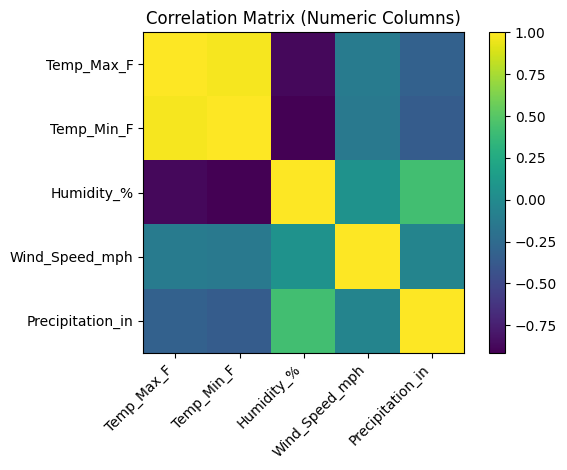

In [22]:
# 4.4 Correlation matrix on numeric columns (ORIGINAL df)
corr = df[num_cols].corr()
display(corr)

# Save CSV for submission
corr.to_csv("screenshots/step4_corr_matrix.csv", index=True)

# Optional: quick visualization using matplotlib (no seaborn)
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix (Numeric Columns)")
plt.tight_layout()
plt.savefig("screenshots/step4_corr_matrix.png", bbox_inches="tight")
plt.show()
